## Loan Prediction

### Steps to solve machine learning projects
1. start
2. data selection
3. data description : A story of data is all abot and the features present in the data
4. performing both statistical and graphical data analysis
5. data tranformation and derivation of new attributes , if necessary
6. selection of machine learning algorithms based on the patterns observed in EDA
7. data standardization and normalization
8. creation of train and test data sets
9. model training using machine learning algorithms
10. calculation of model accuracy : both training and testing accuracy
11. hyper parameter tuning to achieve a better accuracy 
12. saving the created model file 
13. Deployement strategies for model
14. production deployment and testing


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("train.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1994,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
1995,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N
1996,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
1997,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
1998,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y


In [4]:
df.shape

(1999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1956 non-null   object 
 1   Married            1988 non-null   object 
 2   Dependents         1943 non-null   object 
 3   Education          1999 non-null   object 
 4   Self_Employed      1898 non-null   object 
 5   ApplicantIncome    1999 non-null   int64  
 6   CoapplicantIncome  1999 non-null   float64
 7   LoanAmount         1930 non-null   float64
 8   Loan_Amount_Term   1955 non-null   float64
 9   Credit_History     1837 non-null   float64
 10  Property_Area      1999 non-null   object 
 11  Loan_Status        1999 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 187.5+ KB


In [6]:
df.isnull().sum()

Gender                43
Married               11
Dependents            56
Education              0
Self_Employed        101
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            69
Loan_Amount_Term      44
Credit_History       162
Property_Area          0
Loan_Status            0
dtype: int64

In [7]:
df.describe()   #bydefault interger column

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1999.000000,1999.000000,1930.000000,1955.000000,1837.000000
mean,5514.204102,1577.270415,147.048187,342.383632,0.845400
std,6315.834273,2704.724702,86.668297,65.358332,0.361621
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2885.500000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,1126.000000,128.000000,360.000000,1.000000
75%,5818.500000,2283.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
df['ApplicantIncome']

0       5849
1       4583
2       3000
3       2583
4       6000
        ... 
1994    6822
1995    6216
1996    2500
1997    5124
1998    5167
Name: ApplicantIncome, Length: 1999, dtype: int64

In [9]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
1994,6822,141.0
1995,6216,133.0
1996,2500,96.0
1997,5124,124.0


In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## data preprocessing

In [11]:
df.isnull().sum()

Gender                43
Married               11
Dependents            56
Education              0
Self_Employed        101
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            69
Loan_Amount_Term      44
Credit_History       162
Property_Area          0
Loan_Status            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1956 non-null   object 
 1   Married            1988 non-null   object 
 2   Dependents         1943 non-null   object 
 3   Education          1999 non-null   object 
 4   Self_Employed      1898 non-null   object 
 5   ApplicantIncome    1999 non-null   int64  
 6   CoapplicantIncome  1999 non-null   float64
 7   LoanAmount         1930 non-null   float64
 8   Loan_Amount_Term   1955 non-null   float64
 9   Credit_History     1837 non-null   float64
 10  Property_Area      1999 non-null   object 
 11  Loan_Status        1999 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 187.5+ KB


In [13]:
# handle numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
df.isnull().sum()

Gender                43
Married               11
Dependents            56
Education              0
Self_Employed        101
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [15]:
# handle categorical missing data
df['Gender'].mode()[0]

'Male'

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exloratory data anlysis

In [18]:
# !pip install seaborn

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

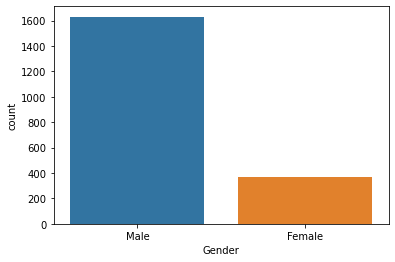

In [19]:
# categorical data
import seaborn as sns
sns.countplot(df['Gender'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

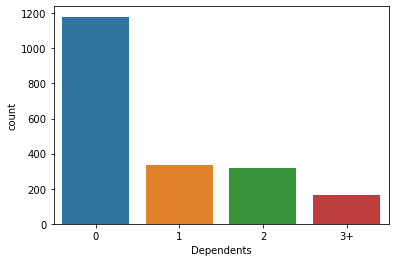

In [20]:
sns.countplot(df.Dependents)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

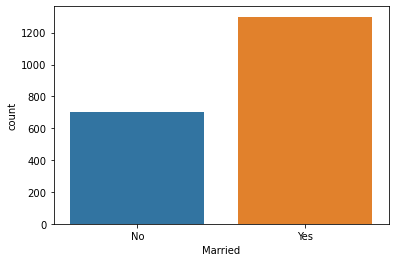

In [21]:
sns.countplot(df.Married)

In [22]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

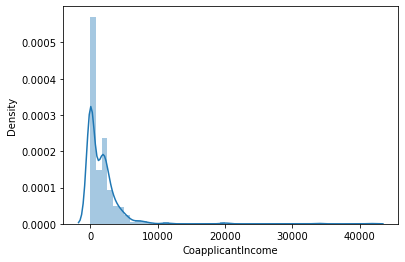

In [23]:
# numerical data
sns.distplot(df.CoapplicantIncome)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

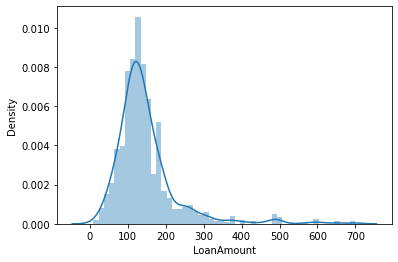

In [24]:
sns.distplot(df.LoanAmount)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

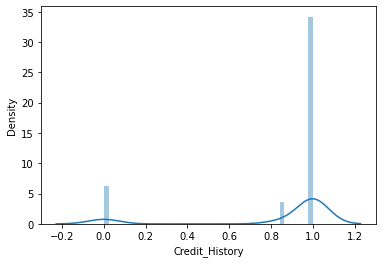

In [25]:
sns.distplot(df.Credit_History)

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,147.048187,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [27]:
# created new column

In [28]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,5849,0.0,147.048187,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [30]:
# data transformation

In [31]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

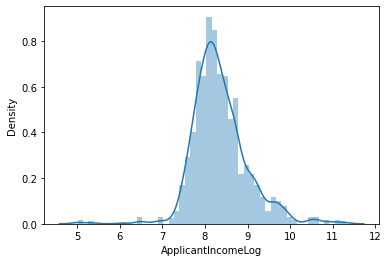

In [32]:
sns.distplot(df.ApplicantIncomeLog)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

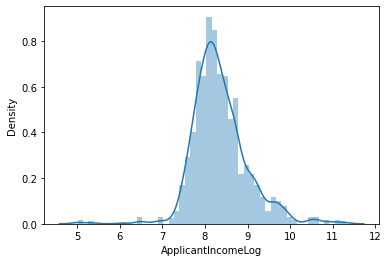

In [33]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

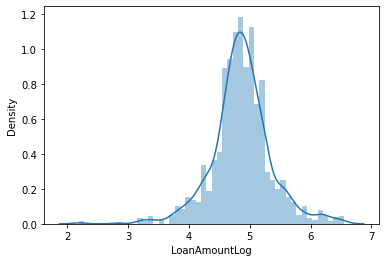

In [34]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

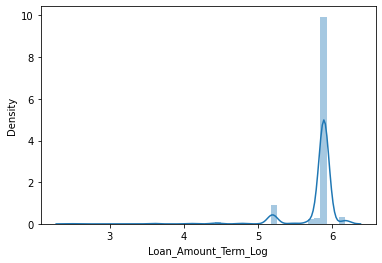

In [35]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

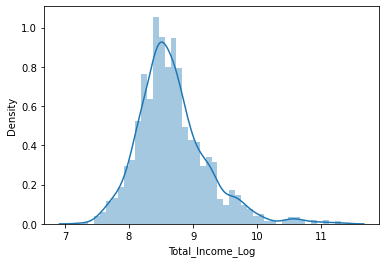

In [36]:
df['Total_Income_Log'] = np.log(df['Total_income'])
sns.distplot(df["Total_Income_Log"])

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,5849,0.0,147.048187,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.990760,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [38]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.990760,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [40]:
df.Loan_Status.value_counts()

Y    1383
N     616
Name: Loan_Status, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1999 non-null   object 
 1   Married               1999 non-null   object 
 2   Dependents            1999 non-null   object 
 3   Education             1999 non-null   object 
 4   Self_Employed         1999 non-null   object 
 5   Credit_History        1999 non-null   float64
 6   Property_Area         1999 non-null   object 
 7   Loan_Status           1999 non-null   object 
 8   ApplicantIncomeLog    1999 non-null   float64
 9   LoanAmountLog         1999 non-null   float64
 10  Loan_Amount_Term_Log  1999 non-null   float64
 11  Total_Income_Log      1999 non-null   float64
dtypes: float64(5), object(7)
memory usage: 187.5+ KB


In [42]:
df.Education.value_counts()

Graduate        1571
Not Graduate     428
Name: Education, dtype: int64

### handling categorical data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1999 non-null   object 
 1   Married               1999 non-null   object 
 2   Dependents            1999 non-null   object 
 3   Education             1999 non-null   object 
 4   Self_Employed         1999 non-null   object 
 5   Credit_History        1999 non-null   float64
 6   Property_Area         1999 non-null   object 
 7   Loan_Status           1999 non-null   object 
 8   ApplicantIncomeLog    1999 non-null   float64
 9   LoanAmountLog         1999 non-null   float64
 10  Loan_Amount_Term_Log  1999 non-null   float64
 11  Total_Income_Log      1999 non-null   float64
dtypes: float64(5), object(7)
memory usage: 187.5+ KB


In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.990760,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [45]:
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)



df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)

In [46]:
# cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
# for col in cols:
#     df[col] = pd.get_dummies(df[col], drop_first= True)

In [47]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.990760,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        1999 non-null   float64
 1   Loan_Status           1999 non-null   object 
 2   ApplicantIncomeLog    1999 non-null   float64
 3   LoanAmountLog         1999 non-null   float64
 4   Loan_Amount_Term_Log  1999 non-null   float64
 5   Total_Income_Log      1999 non-null   float64
 6   Male                  1999 non-null   uint8  
 7   Yes                   1999 non-null   uint8  
 8   1                     1999 non-null   uint8  
 9   2                     1999 non-null   uint8  
 10  3+                    1999 non-null   uint8  
 11  Not Graduate          1999 non-null   uint8  
 12  Yes                   1999 non-null   uint8  
 13  Semiurban             1999 non-null   uint8  
 14  Urban                 1999 non-null   uint8  
dtypes: float64(5), object

In [49]:
df.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.845400,8.353729,4.866468,5.803278,8.675820,0.815408,0.650325,0.166583,0.160080,0.083042,0.214107,0.132066,0.379190,0.315658
std,0.346651,0.652543,0.493299,0.311000,0.549043,0.388064,0.476987,0.372697,0.366772,0.276014,0.410304,0.338647,0.485307,0.464894
min,0.000000,5.010635,2.197225,2.484907,7.273786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.967453,4.615121,5.886104,8.340695,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.255828,4.867534,5.886104,8.599326,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.668798,5.105945,5.886104,8.929303,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302204,6.551080,6.173786,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# test datasets

In [51]:
test = pd.read_csv("test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

test['Total_Income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)



df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


### split datasets

In [53]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.990760,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [54]:
# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [55]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.990760,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.0,8.827908,4.948760,5.886104,8.827908,1,0,0,0,0,0,1,0,0
1995,1.0,8.734882,4.890349,5.886104,8.734882,1,0,0,0,0,1,0,0,0
1996,1.0,7.824046,4.564348,6.173786,7.824046,1,0,0,0,0,0,0,1,0
1997,0.0,8.541691,4.820282,5.835932,8.541691,1,0,0,0,0,0,0,0,0


In [56]:
y

0       Y
1       N
2       Y
3       Y
4       Y
       ..
1994    Y
1995    N
1996    N
1997    N
1998    Y
Name: Loan_Status, Length: 1999, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [58]:
x_train.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
1061,1.0,7.925880,5.043425,5.886104,8.459140,1,1,0,0,0,0,0,0,0
1010,0.0,8.187855,4.779123,5.886104,8.657651,1,1,0,0,0,0,0,0,0
1323,1.0,8.136811,4.844187,5.886104,8.136811,1,0,0,0,0,0,0,1,0
654,0.0,9.615739,5.488938,5.886104,9.615739,1,0,0,0,0,0,0,1,0
182,1.0,8.433812,4.290459,5.192957,8.433812,1,1,0,0,0,0,0,1,0


In [59]:
y_test.head()

256     N
352     Y
298     N
581     N
1288    N
Name: Loan_Status, dtype: object

In [60]:
# model training

In [61]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 98.8


In [63]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 98.8


In [64]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 83.0


In [65]:
# confusion matrics

In [66]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[147,   6],
       [  0, 347]], dtype=int64)

In [67]:
# model save

In [68]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)